## 载入数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")

In [4]:
columns_mapping = {
    'Sex': '性别', 
    'Length': '长度', 
    'Diameter': '直径', 
    'Height': '高度', 
    'Whole weight': '整体重量',             
    'Shucked weight': '去壳后重量', 
    'Viscera weight': '脏器重量', 
    'Shell weight': '壳的重量',             
    'Rings': '环数'  # 目标变量
}

try:
    df_abalone = pd.read_csv("../../data/abalone.csv", header=0)
except Exception as e:
    print(e)
    df_abalone = pd.read_csv(target_url, header=None, prefix="V")
    df_abalone.columns = columns_mapping.keys()
    df_abalone.to_csv("../../data/abalone.csv", index=False)

df_abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [5]:
nrows, ncols = df_abalone.shape
print("Number of Rows: ", nrows)
print("Number of Cols(含目标值):", ncols)

Number of Rows:  4177
Number of Cols(含目标值): 9


## 计算鲍鱼数据的相关性
和岩石vs水雷数据（分类问题）的不同之处是，鲍鱼数据的目标值是连续（回归问题）的，可以将目标值一起计算相关系数与绘图。  
属性与属性之间高相关，可能存在多重共线性，是个问题   
属性与目标值之间高相关，表示属性对目标值的预测性较强，是好事  

In [6]:
# 自动忽略的字符串型变量
df_abalone_corr_matrix = df_abalone.corr()
df_abalone_corr_matrix

Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weight        0.931961      0.882617  0.420884  
Viscera weight        1.000000      0.907656  0.503819  
Shell weight          0.907656      1.000000  0.627574  
Rings                 0.503819      0.627574  1.000000

## 绘制鲍鱼数据的相关性热力图
和岩石vs水雷数据（分类问题）的不同之处是，鲍鱼数据的目标值是连续（回归问题）的，可以将目标值一起计算相关系数与绘图。  
属性与属性之间高相关，可能存在多重共线性，是个问题   
属性与目标值之间高相关，表示属性对目标值的预测性较强，是好事  

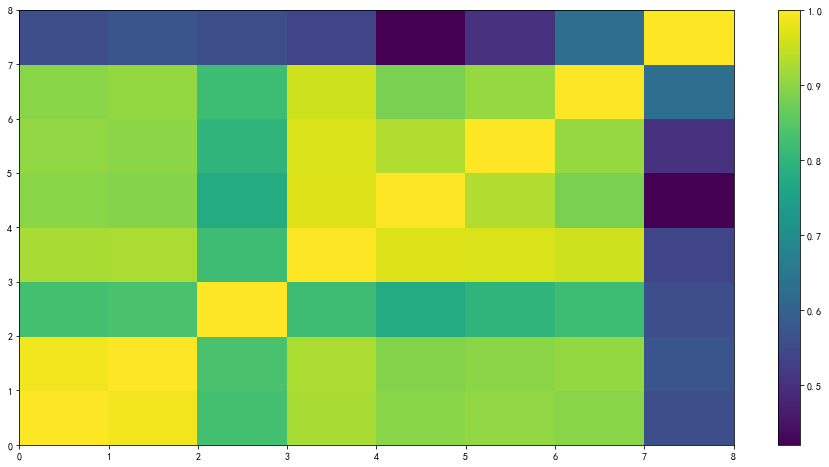

In [7]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
pic = ax.pcolor(df_abalone_corr_matrix) #, cmap=plt.cm.RdBu)
# ax.set_xticklabels(df_abalone_corr_matrix.columns)
# ax.set_yticklabels(df_abalone_corr_matrix.columns)
fig.colorbar(pic, ax=ax)
plt.show()